In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'd:\\OneDrive - knu.ac.kr\\GitHub\\coding\\학석사\\ASF\\code'

In [10]:
# 데이터 불러오기
data = pd.read_excel('../data/ASF.xlsx');data

,구분,신고(발견),확진,시도,시군구,읍면,리,세부주소,위도,경도,개체구분
0,1,2019-10-02,2019-10-03,경기도,연천군,신서면,도밀리,944,38.264123,127.077756,폐사체
1,2,2019-10-11,2019-10-12,경기도,연천군,왕징면,강서리,986,38.090774,126.938503,수렵개체
2,3,2019-10-11,2019-10-12,강원도,철원군,원남면,진현리,115,38.303126,127.600284,폐사체
3,4,2019-10-12,2019-10-12,강원도,철원군,원남면,진현리,25,38.309478,127.602335,폐사체
4,5,2019-10-12,2019-10-12,강원도,철원군,원남면,진현리,21,38.310692,127.604746,폐사체
...,...,...,...,...,...,...,...,...,...,...,...
2656,2657,2022-08-18,2022-08-22,경상북도,영주시,부석면,북지리,570-1,37.006602,128.679543,폐사체
2657,2658,2022-08-17,2022-08-23,강원도,홍천군,서석면,풍암리,산149-2,37.691556,128.165457,폐사체
2658,2659,2022-09-06,2022-09-07,충청북도,제천시,봉양읍,원박리,783-1,37.128691,128.077095,폐사체
2659,2660,2022-09-10,2022-09-13,충청북도,충주시,엄정면,유봉리,163,37.159307,127.919407,폐사체


In [4]:
# 어떤 개체들이 많이 발견되었는지 확인
data[['개체구분']].value_counts()

개체구분
폐사체     2392
수렵개체     219
포획개체      50
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   구분      2661 non-null   int64         
 1   신고(발견)  2660 non-null   datetime64[ns]
 2   확진      2661 non-null   datetime64[ns]
 3   시도      2661 non-null   object        
 4   시군구     2661 non-null   object        
 5   읍면      2661 non-null   object        
 6   리       2647 non-null   object        
 7   세부주소    2661 non-null   object        
 8   위도      2661 non-null   object        
 9   경도      2661 non-null   object        
 10  개체구분    2661 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 228.8+ KB


In [11]:
data.loc[data['위도'] == '36.527540,', '위도'] = '36.527540'
data.loc[data['경도'] == '128.348.9', '경도'] = '128.348900'

In [ ]:
import folium
map = folium.Map(location = [38.264123,127.077756], zoom_start=10,
                tiles='cartodbpositron')


for row in data.itertuples():
    folium.CircleMarker(location=[row.위도,  row.경도], radius=2, color='tomato', fill=True).add_to(map)

map

In [13]:
data = data.iloc[:,[1, 2, 4, 8, 9, 10]]
data

,신고(발견),확진,시군구,위도,경도,개체구분
0,2019-10-02,2019-10-03,연천군,38.264123,127.077756,폐사체
1,2019-10-11,2019-10-12,연천군,38.090774,126.938503,수렵개체
2,2019-10-11,2019-10-12,철원군,38.303126,127.600284,폐사체
3,2019-10-12,2019-10-12,철원군,38.309478,127.602335,폐사체
4,2019-10-12,2019-10-12,철원군,38.310692,127.604746,폐사체
...,...,...,...,...,...,...
2656,2022-08-18,2022-08-22,영주시,37.006602,128.679543,폐사체
2657,2022-08-17,2022-08-23,홍천군,37.691556,128.165457,폐사체
2658,2022-09-06,2022-09-07,제천시,37.128691,128.077095,폐사체
2659,2022-09-10,2022-09-13,충주시,37.159307,127.919407,폐사체


In [14]:
data.rename(columns = {'신고(발견)' : 'find', '확진' : 'Infected', '시군구' : 'Region', '위도' : 'lat', '경도' : 'lon', '개체구분' : 'Species'}, inplace = True)
data

C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_1668\2584490821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'신고(발견)' : 'find', '확진' : 'Infected', '시군구' : 'Region', '위도' : 'lat', '경도' : 'lon', '개체구분' : 'Species'}, inplace = True)


,find,Infected,Region,lat,lon,Species
0,2019-10-02,2019-10-03,연천군,38.264123,127.077756,폐사체
1,2019-10-11,2019-10-12,연천군,38.090774,126.938503,수렵개체
2,2019-10-11,2019-10-12,철원군,38.303126,127.600284,폐사체
3,2019-10-12,2019-10-12,철원군,38.309478,127.602335,폐사체
4,2019-10-12,2019-10-12,철원군,38.310692,127.604746,폐사체
...,...,...,...,...,...,...
2656,2022-08-18,2022-08-22,영주시,37.006602,128.679543,폐사체
2657,2022-08-17,2022-08-23,홍천군,37.691556,128.165457,폐사체
2658,2022-09-06,2022-09-07,제천시,37.128691,128.077095,폐사체
2659,2022-09-10,2022-09-13,충주시,37.159307,127.919407,폐사체


### 데이터 타입 변경

In [18]:

data[['lon', 'lat']] = data[['lon', 'lat']].astype('float')

C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_1668\132934420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['lon', 'lat']] = data[['lon', 'lat']].astype('float')


In [31]:
data.loc[data['lon'] == np.min(data['lon']), 'lon'] = 127.821182


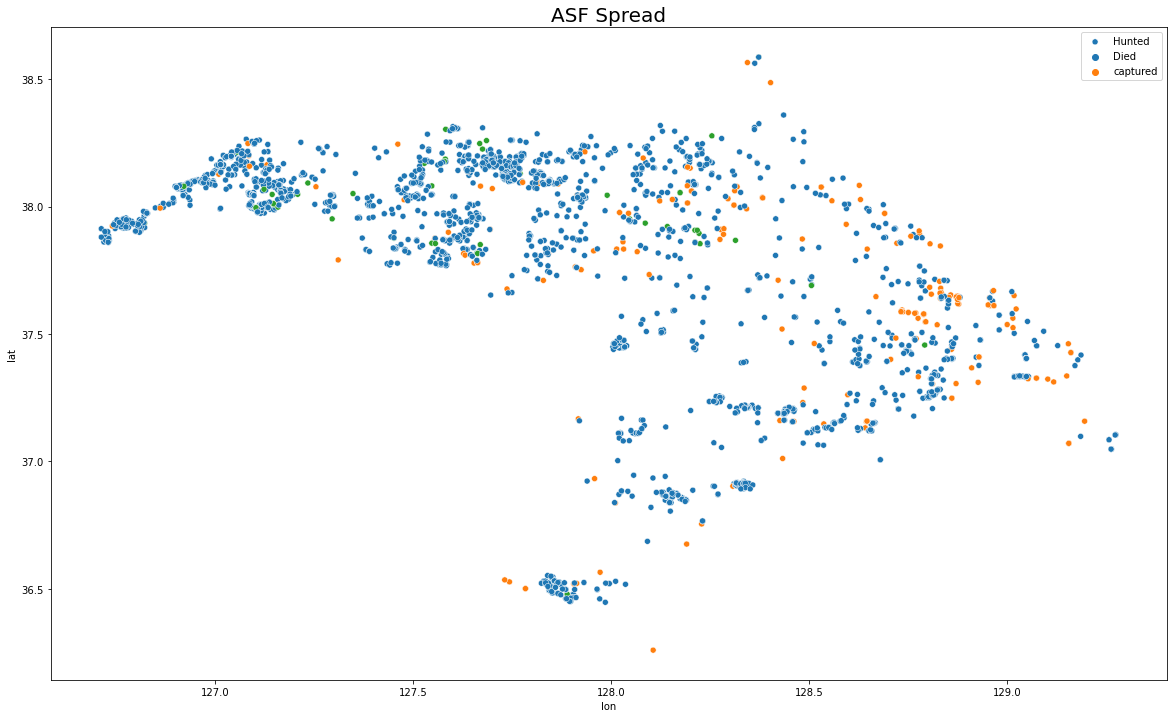

In [39]:

import seaborn as sns
plt.figure(figsize = (20, 12))
sns.scatterplot(data = data, x = 'lon', y = 'lat', hue = 'Species')
plt.title('ASF Spread', fontsize = 20)
plt.legend(['Hunted', 'Died', 'captured'])
plt.show()

In [43]:
## index 데이터 타입 변경
data.index = data.index.astype('int')
data.dropna(inplace = True)

In [54]:
## resample을 사용해 연도별 데이터 분리를 위한 인덱스 변경
data.set_index('Infected', inplace = True)
data.resample('Y')

In [62]:
data.index = data.index.astype('str')
data

,Region,lat,lon,Species
Infected,,,,
2019-10-03,연천군,38.264123,127.077756,폐사체
2019-10-12,연천군,38.090774,126.938503,수렵개체
2019-10-12,철원군,38.303126,127.600284,폐사체
2019-10-12,철원군,38.309478,127.602335,폐사체
2019-10-12,철원군,38.310692,127.604746,폐사체
...,...,...,...,...
2022-08-22,영주시,37.006602,128.679543,폐사체
2022-08-23,홍천군,37.691556,128.165457,폐사체
2022-09-07,제천시,37.128691,128.077095,폐사체


In [65]:
data_2019 = data[data.index.str.contains('2019')]
data_2020 = data[data.index.str.contains('2020')]
data_2021 = data[data.index.str.contains('2021')]
data_2022 = data[data.index.str.contains('2022')]

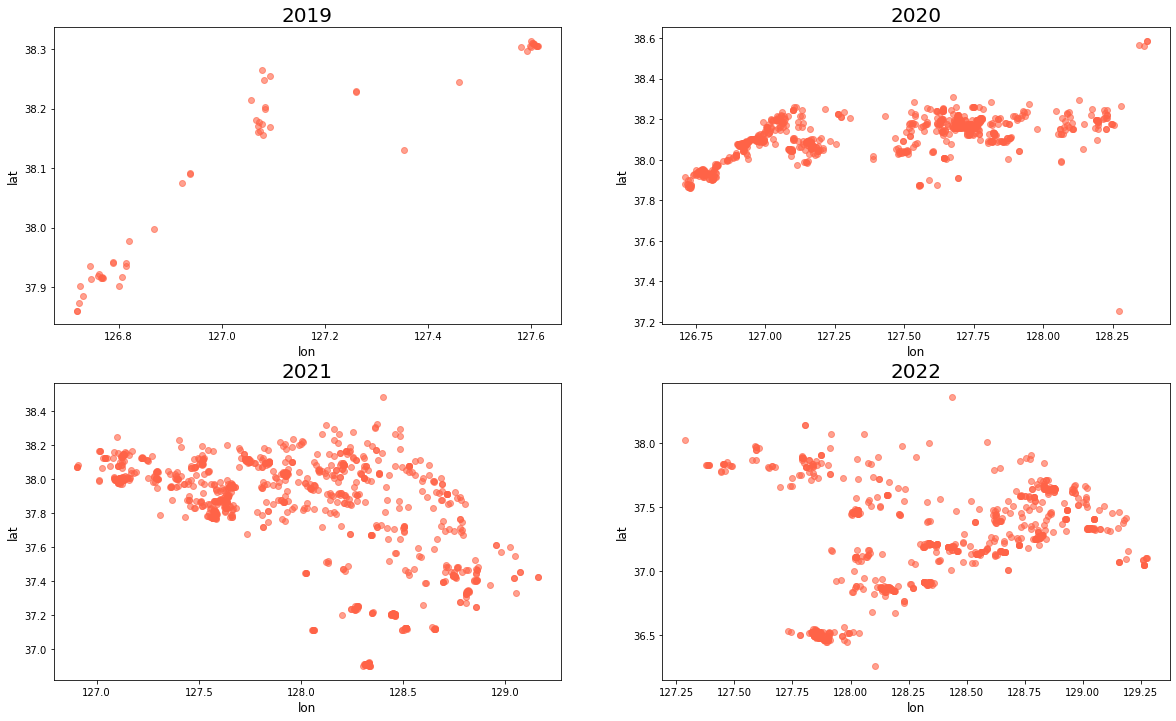

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20, 12))

axes[0][0].set_xlabel('lon', fontsize = 12)
axes[0][0].set_ylabel('lat', fontsize = 12)
axes[0][0].set_title('2019', fontsize = 20)
axes[0][0].scatter(data_2019['lon'], data_2019['lat'], color = 'tomato', alpha = 0.6)

axes[0][1].set_xlabel('lon', fontsize = 12)
axes[0][1].set_ylabel('lat', fontsize = 12)
axes[0][1].set_title('2020', fontsize = 20)
axes[0][1].scatter(data_2020['lon'], data_2020['lat'], color = 'tomato', alpha = 0.6)

axes[1][0].set_xlabel('lon', fontsize = 12)
axes[1][0].set_ylabel('lat', fontsize = 12)
axes[1][0].set_title('2021', fontsize = 20)
axes[1][0].scatter(data_2021['lon'], data_2021['lat'], color = 'tomato', alpha = 0.6)

axes[1][1].set_xlabel('lon', fontsize = 12)
axes[1][1].set_ylabel('lat', fontsize = 12)
axes[1][1].set_title('2022', fontsize = 20)
axes[1][1].scatter(data_2022['lon'], data_2022['lat'], color = 'tomato', alpha = 0.6)

plt.show()

In [77]:
datam = [data_2019, data_2020, data_2021, data_2022]

In [91]:
map = folium.Map(location = [38.264123,127.077756], zoom_start=10,
                tiles='cartodbpositron')



for row in data_2019.itertuples():
    folium.CircleMarker(location=[row.lat,  row.lon], radius=2, color='tomato', fill=True).add_to(map)

map

In [92]:




map = folium.Map(location = [38.264123,127.077756], zoom_start=10,
                tiles='cartodbpositron')
for row in data_2020.itertuples():
    folium.CircleMarker(location=[row.lat,  row.lon], radius=2, color='tomato', fill=True).add_to(map)
           
map

In [89]:




map = folium.Map(location = [38.264123,127.077756], zoom_start=10,
                tiles='cartodbpositron')
for row in data_2021.itertuples():
    folium.CircleMarker(location=[row.lat,  row.lon], radius=2, color='tomato', fill=True).add_to(map)
           
map

In [90]:




map = folium.Map(location = [38.264123,127.077756], zoom_start=10,
                tiles='cartodbpositron')
for row in data_2022.itertuples():
    folium.CircleMarker(location=[row.lat,  row.lon], radius=2, color='tomato', fill=True).add_to(map)
           
map